In [ ]:
data_url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'

import pandas as pd
import numpy as np

df = pd.read_csv(data_url)
df = df.drop(columns = 'Unnamed: 0')

# 숫자여야 하는 것은 year, Sales 항목들 -> year은 int로, sales는 float로

In [ ]:
# 결측치 제거

print(df.shape)
print(df.isna().sum())
df = df.dropna()
print(df.shape)

#제거 후 357개 데이터 빠짐

(16598, 9)
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64
(16241, 9)


In [ ]:

# sales 단위 통일 및 K, M 제거 후 type 변경

def toInt(string):
    if 'K' in string:
        return float(string.replace('K', ''))/1000
    elif 'M' in string:
        return float(string.replace('M', ''))
    else:
        return float(string)

sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for sales in sales_columns:
    df[sales] = df[sales].apply(toInt)


In [ ]:
df['Year'] = df['Year'].apply(float)
df['Year'] = df['Year'].apply(int)
df['Year'] = df['Year'].apply(str)

# year을 int로 변경

for i in range(len(df.Year)):
    if len(df.Year.iloc[i]) == 1:
        df.Year.iloc[i] = '200' + df.Year.iloc[i]

for i in range(len(df.Year)):
    if len(df.Year.iloc[i]) == 2:
        if df.Year.iloc[i] == '10' or df.Year.iloc[i] == '11' or df.Year.iloc[i] == '12' or df.Year.iloc[i] == '13' or df.Year.iloc[i] == '14' or df.Year.iloc[i] == '15' or df.Year.iloc[i] == '16':
            df.Year.iloc[i] = '20' + df.Year.iloc[i]
        else:
            df.Year.iloc[i] = '19' + df.Year.iloc[i]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df.dtypes

Name            object
Platform        object
Year            object
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [ ]:
# 지역에 따라서 선호하는 게임 장르가 다를까 : 동질성 검정 사용
# H0: 지역에 따라 선호하는 게임 장르가 동일하다.
# H1: 지역에 따라 선호하는 게임 장르가 동일하지 않다.

# 지역과 장르 간 교차표
nation_genre = np.transpose(df.groupby('Genre').sum())
nation_genre.index.name = 'Nation'
print(nation_genre)


Genre        Action  Adventure  Fighting  ...  Simulation  Sports  Strategy
Nation                                    ...                              
NA_Sales     858.75     101.79    220.35  ...      181.43  667.26     67.83
EU_Sales     513.64      63.66     99.90  ...      112.99  370.97     44.82
JP_Sales     156.60      51.87     87.14  ...       63.54  134.76     49.10
Other_Sales  183.99      16.70     36.15  ...       31.32  132.35     11.23

[4 rows x 12 columns]


In [ ]:
import scipy.stats as stats

chi, p, dof, ex = stats.chi2_contingency(nation_genre)
print(chi, p, dof)

# p-value가 e-123으로 매우 작으므로 1% 유의수준 하에서 귀무가설을 기각할 수 있다. 따라서 지역에 따른 장르별 매출액에 차이가 있다. 따라서 지역에 따라 장르별 선호도가 다르다고 볼 수 있다.

684.336340516928 9.635373883688875e-123 33


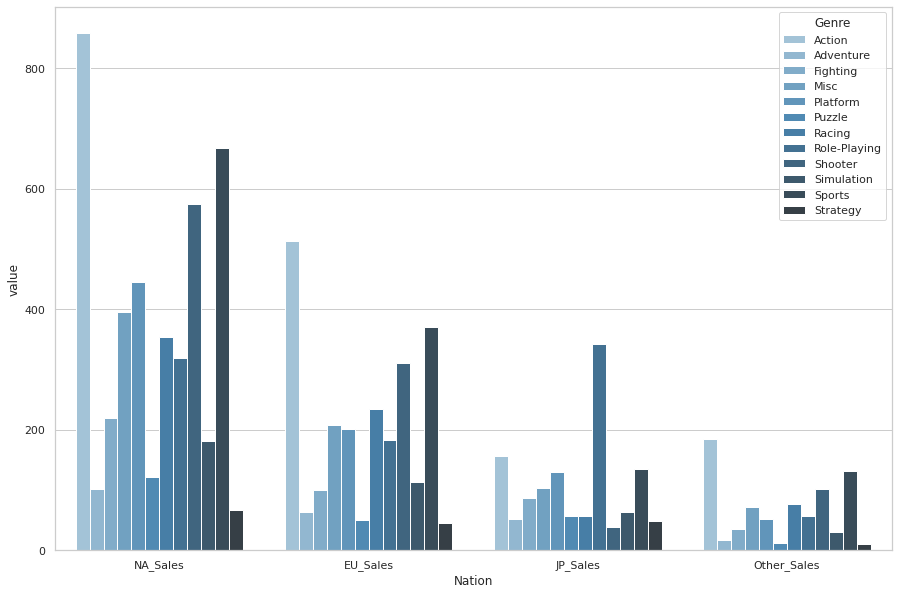

In [ ]:
# 시각화를 위해 tidy data로 변환
nation_genre = nation_genre.reset_index()
df1 = nation_genre.melt(id_vars = ['Nation']).set_index(['Nation', 'Genre']).reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize' : (15, 10)}, style = "whitegrid")
sns.barplot(x = 'Nation', y = 'value', hue = 'Genre', data = df1, palette = 'Blues_d')

In [ ]:
# 연도별 게임의 트렌드가 있을까

year_genre = pd.crosstab(df['Year'], df['Genre'], margins = True)
year_platform = pd.crosstab(df['Year'], df['Platform'], margins = True)
year_genre_ratio = pd.crosstab(df['Year'], df['Genre'], normalize = 'index')
year_platform_ratio = pd.crosstab(df['Year'], df['Platform'], normalize = 'index')

year_genre


Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
Year,,,,,,,,,,,,,
1980,1,0,1,4,0,0,0,0,2,0,0,0,8
1981,25,0,0,0,3,2,1,0,10,1,4,0,46
1982,18,0,0,1,5,3,2,0,5,0,2,0,36
1983,7,1,0,1,5,1,0,0,1,0,1,0,17
1984,1,0,0,1,1,3,3,0,3,0,2,0,14
1985,2,0,1,0,4,4,0,0,1,1,1,0,14
1986,6,0,0,0,6,0,1,1,4,0,3,0,21
1987,2,1,2,0,2,0,0,3,2,0,4,0,16
1988,2,0,0,0,4,1,1,3,1,1,2,0,15


In [ ]:
year_genre = year_genre.reset_index()
year_platform= year_platform.reset_index()

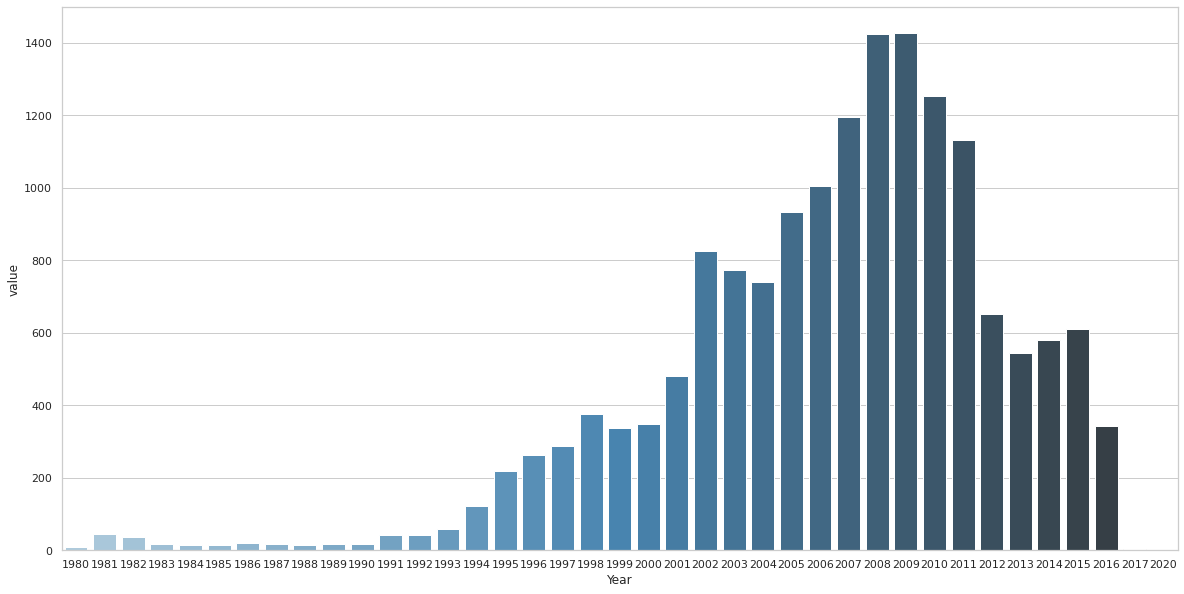

In [ ]:

df2 = year_genre.melt(id_vars = ['Year']).set_index(['Year', 'Genre']).reset_index()
df2 = df2.iloc[:-1, :]

year_total = df2[(df2['Genre'] == 'All')].reset_index()

sns.set(rc = {'figure.figsize' : (20, 10)}, style = "whitegrid")
sns.barplot(x = 'Year', y = 'value', data = year_total, palette = 'Blues_d')


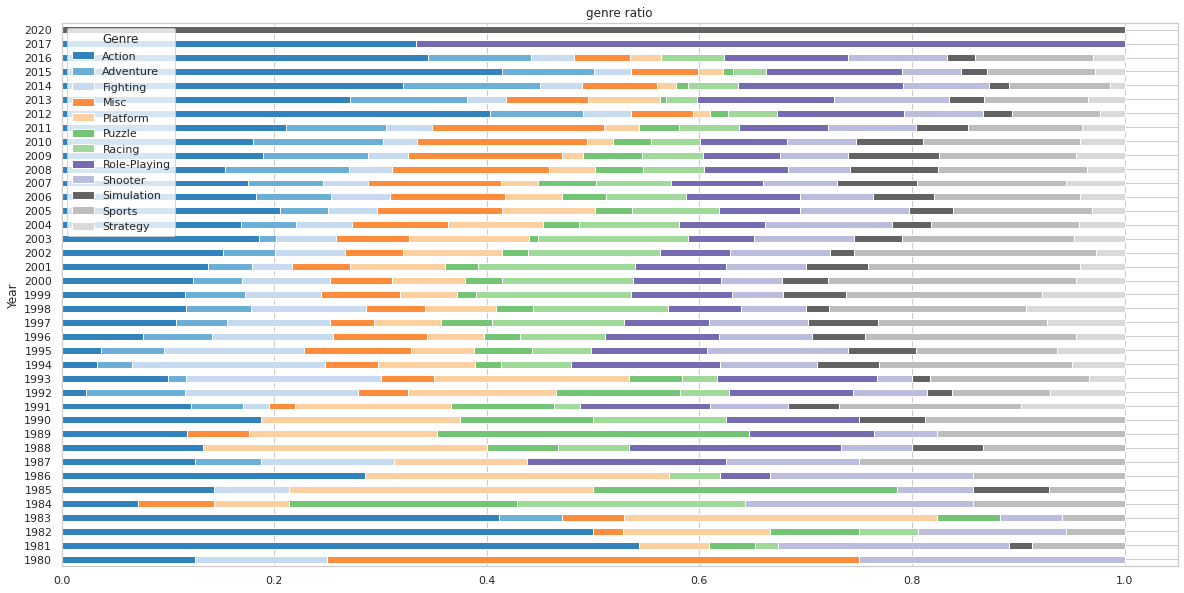

In [ ]:
import matplotlib.pyplot as plt

year_genre_ratio = year_genre_ratio.reset_index()
year_platform_ratio = year_platform_ratio.reset_index()

year_genre_ratio.plot(
    x = 'Year',
    kind = 'barh',
    stacked = True,
    title = 'genre ratio',
    mark_right = True, cmap = 'tab20c')


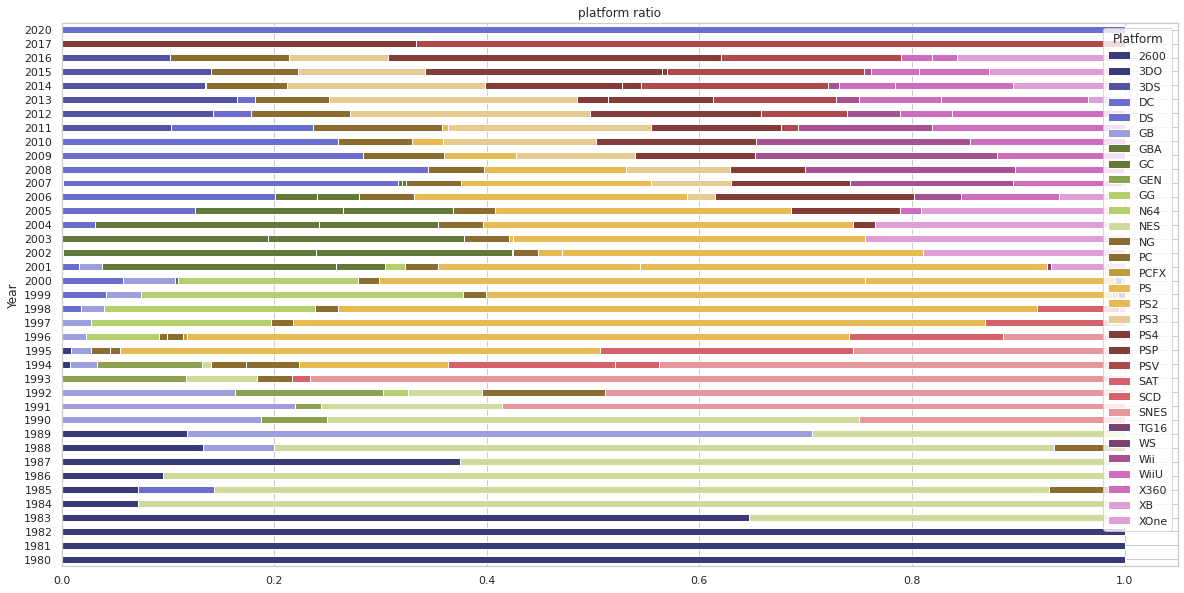

In [ ]:

year_platform_ratio.plot(
    x = 'Year',
    kind = 'barh',
    stacked = True,
    title = 'platform ratio',
    mark_right = True, cmap = 'tab20b')


In [ ]:
# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [ ]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

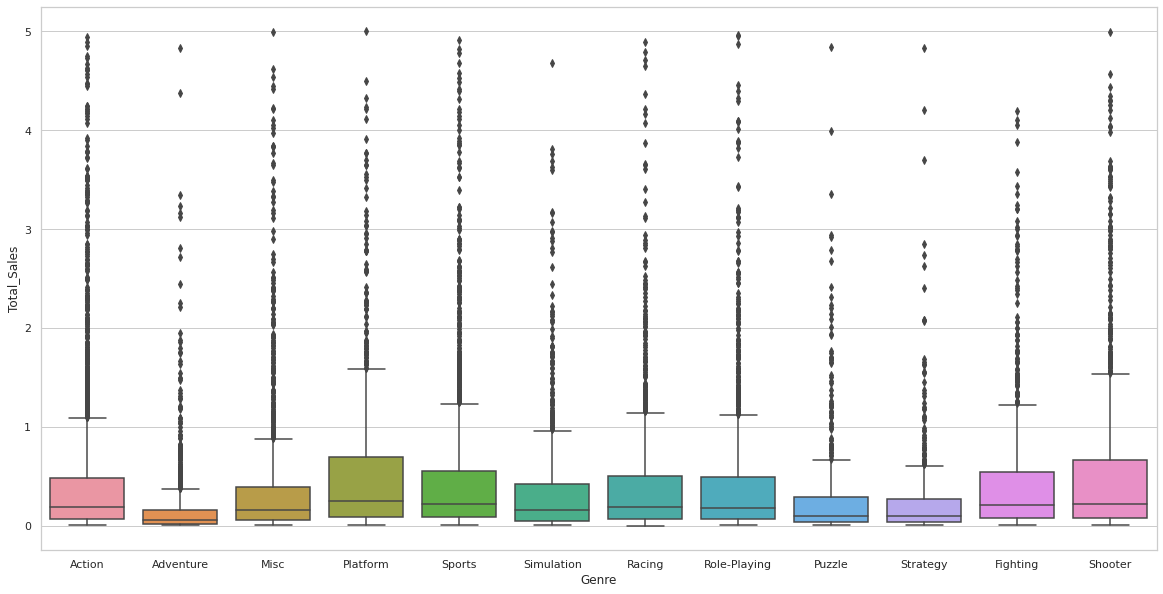

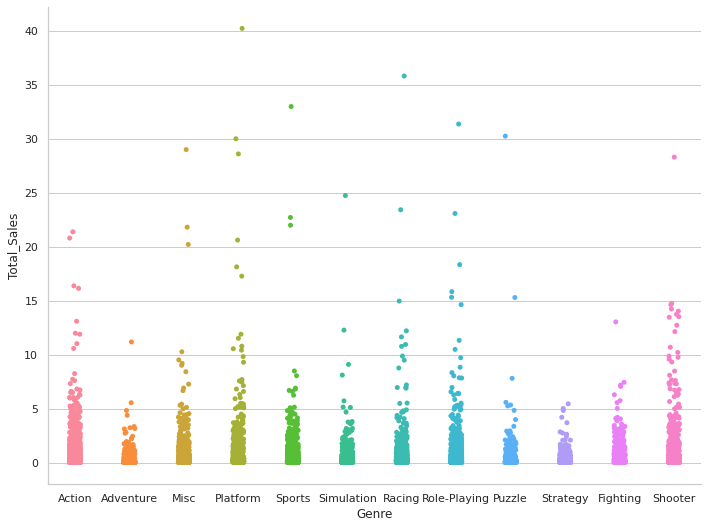

In [ ]:
df_wo_1outlier = df.drop(index = df.index[df['Total_Sales'] > 50])
df_wo_outlier = df.drop(index = df.index[df['Total_Sales'] > 5])

graph1 = sns.boxplot(x = 'Genre', y = 'Total_Sales', data = df_wo_outlier)
graph2 = sns.catplot(x = 'Genre', y = 'Total_Sales', data = df_wo_1outlier, height = 7.5, aspect = 10/7.5)

#sports게임 50mil 이상 매출 빠짐.

In [ ]:
df[df['Total_Sales'] > 10].groupby('Genre').count()


,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,,,,,
Action,9,9,9,9,9,9,9,9,9
Adventure,1,1,1,1,1,1,1,1,1
Fighting,1,1,1,1,1,1,1,1,1
Misc,4,4,4,4,4,4,4,4,4
Platform,11,11,11,11,11,11,11,11,11
Puzzle,2,2,2,2,2,2,2,2,2
Racing,7,7,7,7,7,7,7,7,7
Role-Playing,8,8,8,8,8,8,8,8,8
Shooter,12,12,12,12,12,12,12,12,12


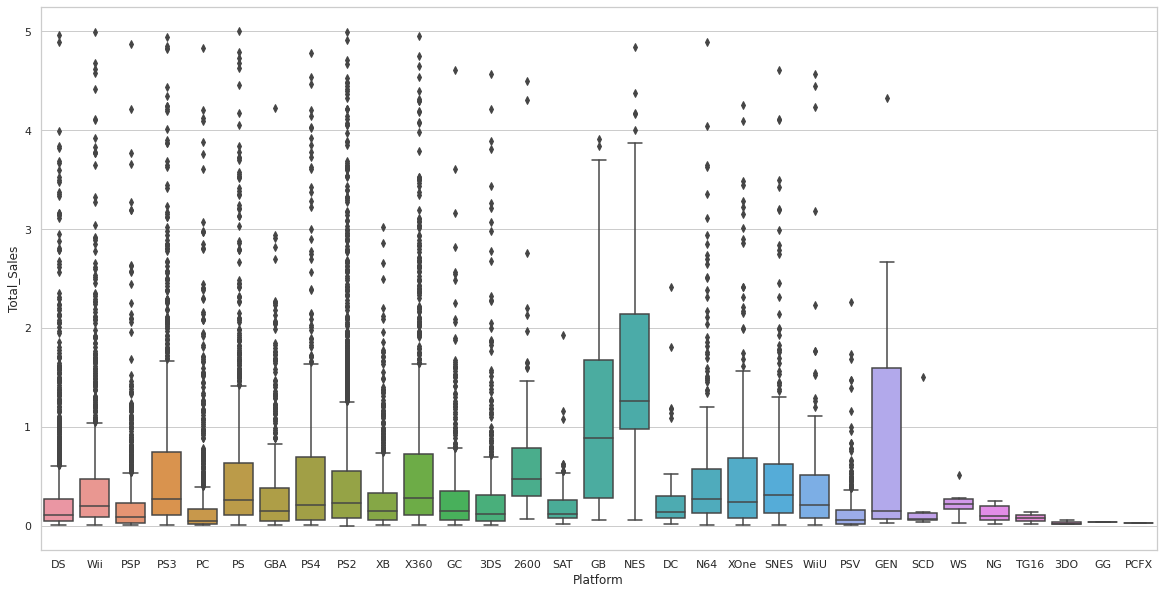

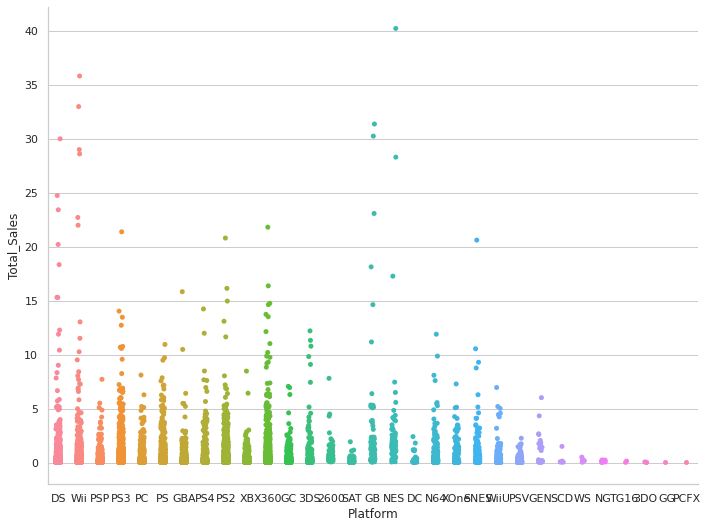

In [ ]:

graph1 = sns.boxplot(x = 'Platform', y = 'Total_Sales', data = df_wo_outlier)
graph2 = sns.catplot(x = 'Platform', y = 'Total_Sales', data = df_wo_1outlier, height = 7.5, aspect = 10/7.5)

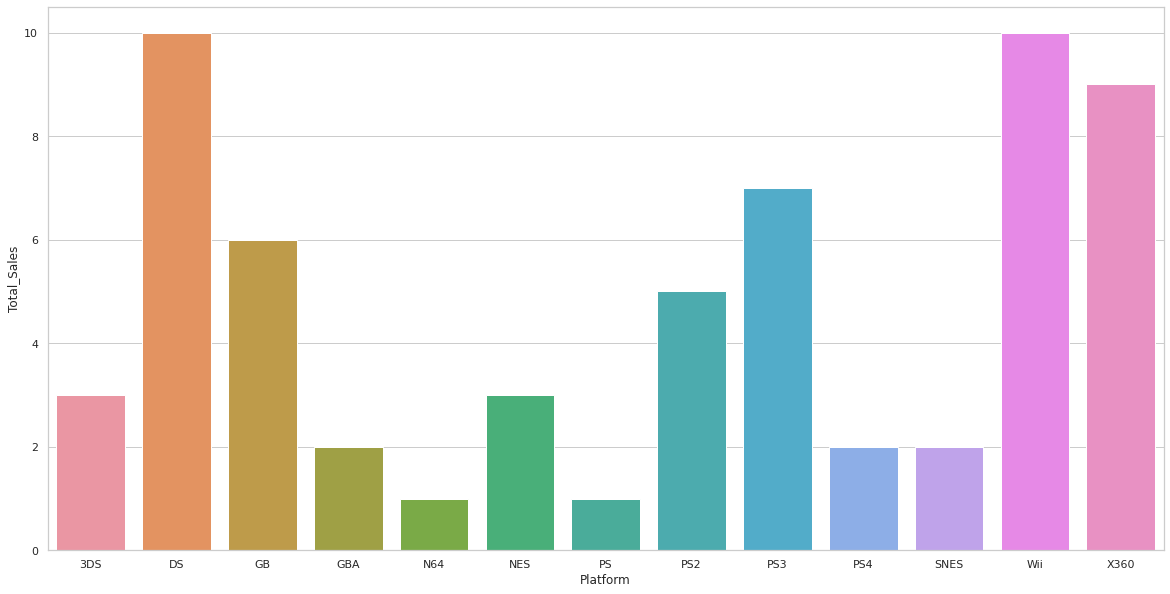

In [ ]:
df5 = df[df['Total_Sales'] > 10].groupby('Platform').count().reset_index()
sns.barplot(x = 'Platform', y = 'Total_Sales', data = df5)

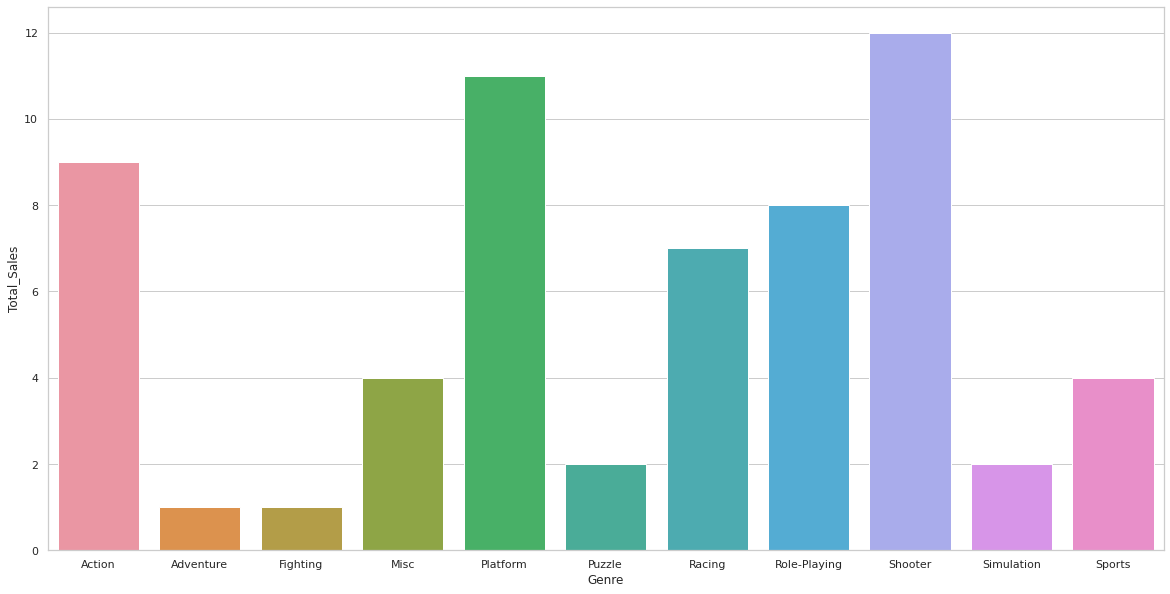

In [ ]:
df6 = df[df['Total_Sales'] > 10].groupby('Genre').count().reset_index()
sns.barplot(x = 'Genre', y = 'Total_Sales', data = df6)

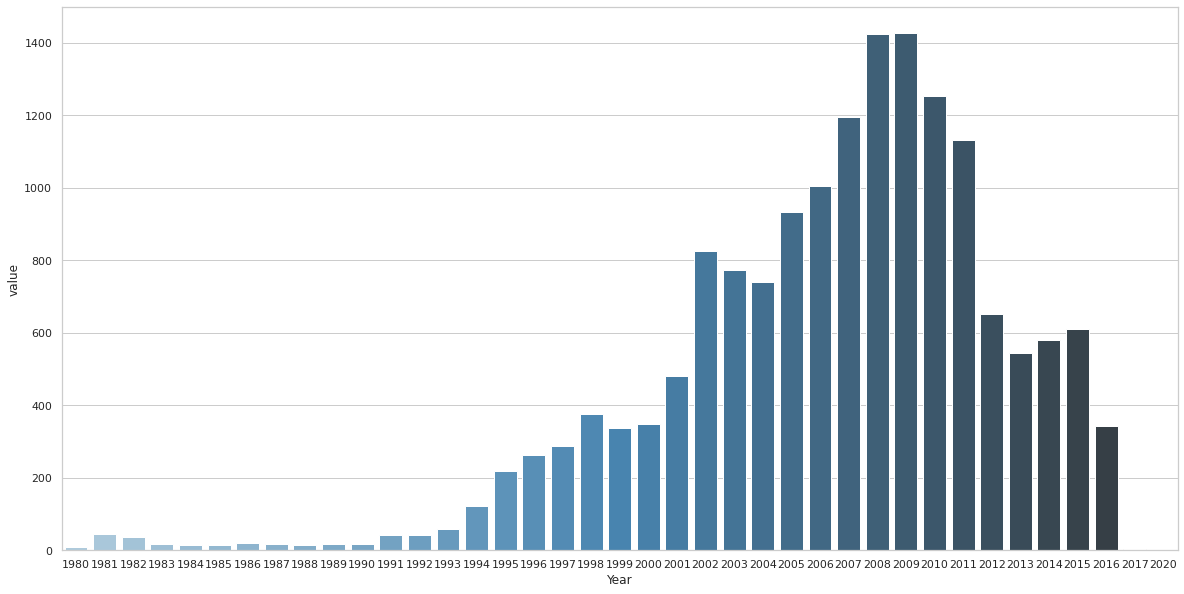

In [ ]:
year_sales = pd.crosstab(df['Year'], df['Total_Sales'], margins = True)
year_sales = year_sales.reset_index()
df7 = year_sales.melt(id_vars = ['Year']).set_index(['Year']).reset_index()
df7 = df7.iloc[:-1, :]

year_sales = df7[(df7['Total_Sales'] == 'All')].reset_index()

sns.set(rc = {'figure.figsize' : (20, 10)}, style = "whitegrid")
sns.barplot(x = 'Year', y = 'value', data = year_sales, palette = 'Blues_d')